1. dopočítat rychlost otáčení magnetu vůči otáčení vrtačky
2. vypočítat sílu když jsou magnety přesně ve fázi
3. vypočítat sílu z momentu v závislosti na úhlu
4. prezentace

$$
\nu_{drill} = 2100 RPM = 35 RPS \\
\nu_{lev} = \frac{4 R}{536f-80f} \cdot \frac{1000 f}{1 s} = 8.77 RPS \\
$$

$$
\frac{\nu_{drill}}{\nu_{lve}} = 3.99
$$

$$
\nu_{drill} = 2100 RPM = 35 RPS \\
\nu_{mag} = \frac{8 R}{268f-13f} \cdot \frac{1000 f}{1 s} = 31.37 RPS \\
$$

$$
\frac{\nu_{drill}}{\nu_{mag}} = 1.12
$$

In [10]:
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mpl_lines
import numpy as np

%matplotlib widget

# code modified to change negative values to positive ones
def lmap(f,x):
    return list(map(f,x))

def lfilter(f,x):
    return list(filter(f,x))

# 2 síla ve fázi závislá na úhlu

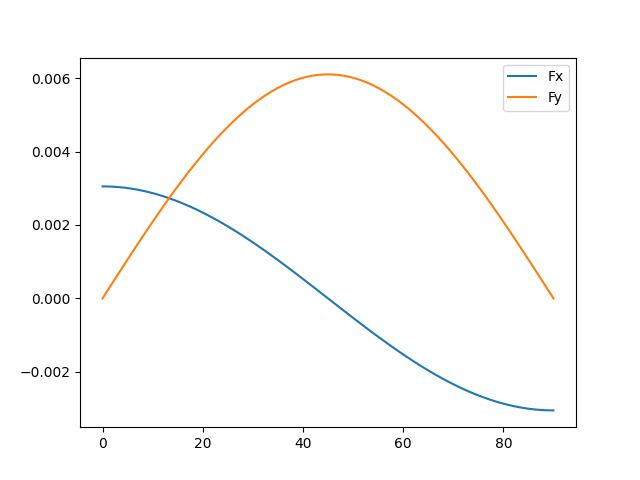

In [11]:
mu_0 = 4*math.pi * 1e-7
B_r = 1

d_0 = 15*1e-4
h_0 = 2*1e-4
V_0 = 2*math.pi * (d_0/2)**2 * h_0
k_0 = V_0*B_r/mu_0

d_1 = 30*1e-4
h_1 = 5*1e-4
V_1 = 2*math.pi * (d_1/2)**2 * h_1
k_1 = V_1*B_r/mu_0

r_y = 42*1e-4

def getF(d, a):
    kF = 3*mu_0 * k_0 * k_1 / (4*math.pi * math.pow(d**2 + r_y**2, 5/2))
    c = math.cos(a)
    s = math.sin(a)

    Fx = r_y * c - d * s - ((5*d**2*r_y*c - 5*d*r_y**2*s)/(d**2+r_y**2))
    Fy = d * c - 3*r_y* s - ((5*d*r_y**2*c - 5*r_y**3*s)/(d**2+r_y**2))
    Fz = 0
    return (kF*Fx, kF*Fy, kF*Fz)

ang_range = list(np.linspace(0, math.pi, 100))
plt.figure()
plt.plot(
    lmap(lambda a: a*90/math.pi, ang_range),
    lmap(lambda a: getF(0, a)[0], ang_range),
    label="Fx"
)
plt.plot(
    lmap(lambda a: a*90/math.pi, ang_range),
    lmap(lambda a: getF(0, a)[1], ang_range), 
    label="Fy"
)
plt.legend()

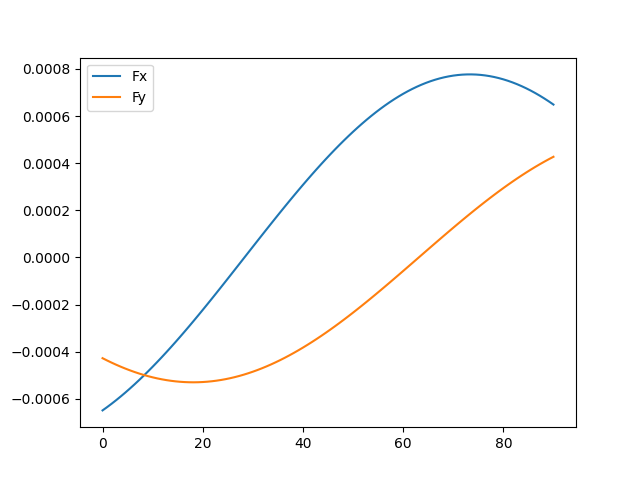

In [12]:
plt.figure()
plt.plot(
    lmap(lambda a: a*90/math.pi, ang_range),
    lmap(lambda a: getF(0.005, a)[0], ang_range),
    label="Fx"
)
plt.plot(
    lmap(lambda a: a*90/math.pi, ang_range),
    lmap(lambda a: getF(0.005, a)[1], ang_range), 
    label="Fy"
)
plt.legend()